<a href="https://colab.research.google.com/github/thuvarahan97/DataStorm1.0_TeamFixzels/blob/master/Day2/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd             #to use read_csv(), crosstab()
import numpy as np              #to use exponentiation : exp()
import statsmodels.api as sm    #to use the Logit()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
#import the dataset
traindatainput = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataStorm1.0 - Team Fixzels/credit_card_default_train.csv',sep=",")
testdatainput = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataStorm1.0 - Team Fixzels/credit_card_default_test.csv',sep=",")

In [0]:
traindata, testdata = train_test_split(traindatainput, train_size=0.8, test_size=0.2)

In [428]:
traindata.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
1040,A1303,200K,M,High School,Single,31-45,0,0,0,0,0,0,115364,118302,27960,29794,31617,33398,5544,2786,2310,2310,2310,2310,0
21987,A27529,1M,F,Other,Single,46-65,-1,-1,-1,-1,0,0,32555,24428,17729,42971,47265,77163,24428,17752,42989,18480,48519,0,0
21617,A27073,400K,F,High School,Other,31-45,-2,-2,-2,-2,-2,-2,3650,6757,-1273,-4491,-10233,-13428,6780,9,16,9,16,23109,0
14621,A18298,1M,M,Other,Single,46-65,0,0,0,0,0,0,670387,685476,701515,523458,519604,528787,25385,27951,18480,18480,20790,17718,0
11366,A14199,200K,F,Other,Single,46-65,-1,-1,0,0,0,0,44031,114895,115468,20261,19931,17242,121270,4403,642,813,1035,462,0


In [429]:
traindata.describe()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
count,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,19200.000000,1.920000e+04,19200.000000
mean,-0.015833,-0.131615,-0.161354,-0.214531,-0.260885,-0.287135,1.184254e+05,1.133854e+05,1.084892e+05,9.982352e+04,9.334551e+04,8.987581e+04,1.325928e+04,1.371325e+04,1.218679e+04,1.132695e+04,11123.981042,1.230892e+04,0.223125
std,1.120371,1.197085,1.197514,1.167724,1.135908,1.150121,1.707639e+05,1.646757e+05,1.610800e+05,1.488087e+05,1.417009e+05,1.386388e+05,3.857097e+04,5.582665e+04,4.238030e+04,3.673800e+04,36403.088815,4.260300e+04,0.416352
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.536100e+04,-1.611850e+05,-1.065530e+05,-3.927000e+05,-1.878820e+05,-7.844830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.405500e+03,6.905750e+03,6.237000e+03,5.380000e+03,4.092000e+03,2.943250e+03,2.310000e+03,1.931000e+03,9.010000e+02,6.650000e+02,596.000000,2.820000e+02,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.137200e+04,4.825250e+04,4.608150e+04,4.404700e+04,4.173850e+04,3.919700e+04,4.900000e+03,4.637000e+03,4.159000e+03,3.465000e+03,3465.000000,3.465000e+03,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.547355e+05,1.475445e+05,1.389655e+05,1.260680e+05,1.163722e+05,1.139262e+05,1.157350e+04,1.155000e+04,1.062600e+04,9.449250e+03,9388.500000,9.247000e+03,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.228020e+06,2.272881e+06,3.844046e+06,2.059564e+06,2.141765e+06,2.221444e+06,2.017905e+06,3.890638e+06,2.069852e+06,1.434510e+06,965557.000000,1.221218e+06,1.000000


In [0]:
traindata=traindata.replace(['M','F'], [1,-1]) 

In [431]:
pd.to_numeric(traindata['Gender'])

1040     1
21987   -1
21617   -1
14621    1
11366   -1
        ..
16743   -1
1686     1
17512    1
16881   -1
8189     1
Name: Gender, Length: 19200, dtype: int64

In [432]:
print(traindata.groupby('EDUCATION_STATUS').count())

                  Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
EDUCATION_STATUS                               ...                                  
Graduate               6749              6749  ...          6749                6749
High School            3130              3130  ...          3130                3130
Other                  9321              9321  ...          9321                9321

[3 rows x 24 columns]


In [0]:
traindata=traindata.replace(['Graduate','High School','Other'], [2,1,0]) 

In [434]:
pd.to_numeric(traindata['EDUCATION_STATUS'])

1040     1
21987    0
21617    1
14621    0
11366    0
        ..
16743    1
1686     0
17512    0
16881    0
8189     2
Name: EDUCATION_STATUS, Length: 19200, dtype: int64

In [435]:
print(traindata.groupby('MARITAL_STATUS').count())

                Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
MARITAL_STATUS                               ...                                  
0                   10463             10463  ...         10463               10463
Single               8737              8737  ...          8737                8737

[2 rows x 24 columns]


In [0]:
traindata=traindata.replace(['Single'], [1]) 

In [437]:
pd.to_numeric(traindata['EDUCATION_STATUS'])

1040     1
21987    0
21617    1
14621    0
11366    0
        ..
16743    1
1686     0
17512    0
16881    0
8189     2
Name: EDUCATION_STATUS, Length: 19200, dtype: int64

In [438]:
print(traindata.groupby('AGE').count())

              Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
AGE                                        ...                                  
31-45              9683              9683  ...          9683                9683
46-65              3351              3351  ...          3351                3351
Less than 30       6096              6096  ...          6096                6096
More than 65         70                70  ...            70                  70

[4 rows x 24 columns]


In [0]:
traindata['AGE']=traindata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4]) 

In [0]:
traindata['Balance_Limit_V1'] = traindata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)

In [441]:
pd.to_numeric(traindata['Balance_Limit_V1'])

1040      200000.0
21987    1000000.0
21617     400000.0
14621    1000000.0
11366     200000.0
           ...    
16743     100000.0
1686      300000.0
17512    1000000.0
16881     100000.0
8189      200000.0
Name: Balance_Limit_V1, Length: 19200, dtype: float64

In [442]:
print(traindata.groupby('NEXT_MONTH_DEFAULT').count())

                    Client_ID  Balance_Limit_V1  ...  PAID_AMT_NOV  PAID_AMT_DEC
NEXT_MONTH_DEFAULT                               ...                            
0                       14916             14916  ...         14916         14916
1                        4284              4284  ...          4284          4284

[2 rows x 24 columns]


In [0]:
traindata[traindata.columns[12:24]]=traindata[traindata.columns[12:24]]/traindata.max()[traindata.columns[12:24]]

In [0]:
traindata['Balance_Limit_V1']=traindata['Balance_Limit_V1']/traindata.max()['Balance_Limit_V1']

In [0]:
traindata['BIAS']=1

In [0]:
testdata=testdata.replace(['M','F'], [1,-1])
testdata=testdata.replace(['Graduate','High School','Other'], [2,1,0])
testdata=testdata.replace(['Single'], [1])
testdata['AGE']=testdata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4]) 
testdata['Balance_Limit_V1'] = testdata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)
testdata[testdata.columns[12:24]]=testdata[testdata.columns[12:24]]/testdata.max()[testdata.columns[12:24]]
testdata['BIAS']=1
testdata['Balance_Limit_V1']=testdata['Balance_Limit_V1']/testdata.max()['Balance_Limit_V1']

In [0]:
independentVar= ['Balance_Limit_V1',
                 'Gender',
                 'EDUCATION_STATUS',
                 'MARITAL_STATUS',
                 'AGE',
                 'PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC',
                 'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC',
                 'PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC','BIAS']

In [0]:
X_train, y_train = traindata[independentVar], traindata['NEXT_MONTH_DEFAULT']
X_test, y_test = testdata[independentVar], testdata['NEXT_MONTH_DEFAULT']

In [0]:
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense

In [450]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.4)
# fit and apply the transform
X_train_res, y_train_res = under.fit_resample(X_train, y_train)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train_res, y_train_res.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=24, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [453]:
# fit the keras model on the dataset
history = model.fit(X_train_res, y_train_res, epochs=50)

Epoch 1/50
21420/21420 [==============================] - 5s 239us/step - loss: 0.5888 - acc: 0.6977
Epoch 2/50
21420/21420 [==============================] - 3s 159us/step - loss: 0.5667 - acc: 0.7107
Epoch 3/50
21420/21420 [==============================] - 3s 158us/step - loss: 0.5590 - acc: 0.7145
Epoch 4/50
21420/21420 [==============================] - 3s 159us/step - loss: 0.5522 - acc: 0.7180
Epoch 5/50
21420/21420 [==============================] - 3s 159us/step - loss: 0.5460 - acc: 0.7212
Epoch 6/50
21420/21420 [==============================] - 3s 159us/step - loss: 0.5382 - acc: 0.7233
Epoch 7/50
21420/21420 [==============================] - 3s 160us/step - loss: 0.5323 - acc: 0.7278
Epoch 8/50
21420/21420 [==============================] - 3s 159us/step - loss: 0.5261 - acc: 0.7310
Epoch 9/50
21420/21420 [==============================] - 3s 158us/step - loss: 0.5190 - acc: 0.7345
Epoch 10/50
21420/21420 [==============================] - 3s 159us/step - loss: 0.5114 - a

In [0]:
# make probability predictions with the model
y_pred = model.predict(X_test)

# round predictions
y_pred_rounded = [round(x[0]) for x in y_pred]

In [455]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rounded)
print(confusion_matrix)

[[2828  926]
 [ 477  569]]


In [456]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rounded))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      3754
           1       0.38      0.54      0.45      1046

    accuracy                           0.71      4800
   macro avg       0.62      0.65      0.62      4800
weighted avg       0.75      0.71      0.72      4800



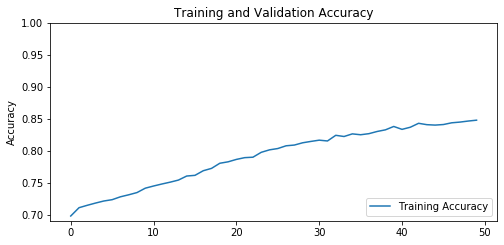

In [457]:
acc = history.history['acc']
# val_acc = history.history['val_acc']

loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()